In [114]:
import numpy
import matplotlib.pyplot as plot
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('data/customer_churn.csv')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [115]:
data.shape

(7043, 21)

In [116]:
data_ = data.loc[:,['tenure','TotalCharges']]

data_.head()

,tenure,TotalCharges
0,1,29.85
1,34,1889.5
2,2,108.15
3,45,1840.75
4,2,151.65


In [127]:
data_['tenure'] = pd.to_numeric(data_['tenure'], errors='coerce')
data_['TotalCharges'] = pd.to_numeric(data_['TotalCharges'], errors='coerce')

data_ = data_.dropna()

In [128]:
x = data_.iloc[:, :1].values
y = data_.iloc[:, -1].values

In [129]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [130]:
linearRegressor = LinearRegression()

In [131]:
linearRegressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
yPrediction = linearRegressor.predict(xTest)

In [133]:
print('Coefficient: \n', linearRegressor.coef_)
print('Intercept: \n', linearRegressor.intercept_)

('Coefficient: \n', array([77.12523619]))
('Intercept: \n', -198.39124526922114)


In [134]:
linearRegressor.score(xTest, yTest)

0.6511461921296484

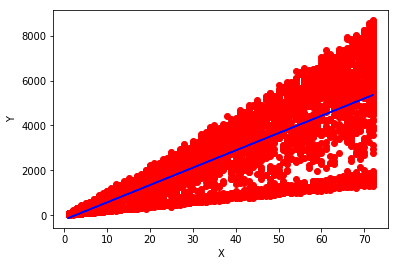

In [135]:
plot.scatter(xTrain, yTrain, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.xlabel('X')
plot.ylabel('Y')
plot.show()

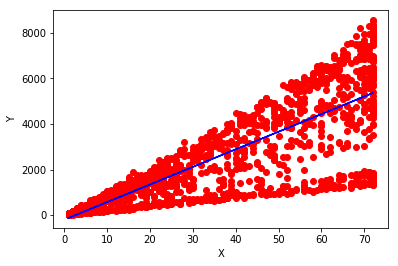

In [136]:
plot.scatter(xTest, yTest, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.xlabel('X')
plot.ylabel('Y')
plot.show()